In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df1 = pd.read_csv('European_bank_marketing.csv')
df1.shape

(41188, 22)

41,188 observations, with 22 features 

In [19]:
df1.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


Can't see all column names above:

In [20]:
# Look at the types of data in the file

df1.dtypes

age                    int64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
term_deposit           int64
Ethnicity_African      int64
dtype: object

In [21]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit',
       'Ethnicity_African'],
      dtype='object')

In [22]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.029353
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.168797
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000


Average age of those involved is 40. Oldest was 98, youngest was 17. 

In [23]:
# Look at the class distribution

term_deposits_count = df1.groupby('term_deposit').size()
print(term_deposits_count)

term_deposit
0    36548
1     4640
dtype: int64


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

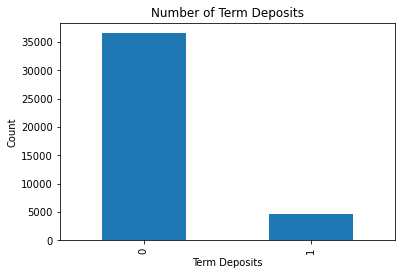

In [24]:
# Bar Chart of Term Deposits

df1['term_deposit'].value_counts().plot(kind='bar')
plt.title('Number of Term Deposits')
plt.xlabel('Term Deposits')
plt.ylabel('Count')
sns.despine

Clear imbalance of the data. Many more people are not subscribed to a term deposit than those who are.

/Users/matthewtorretta/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


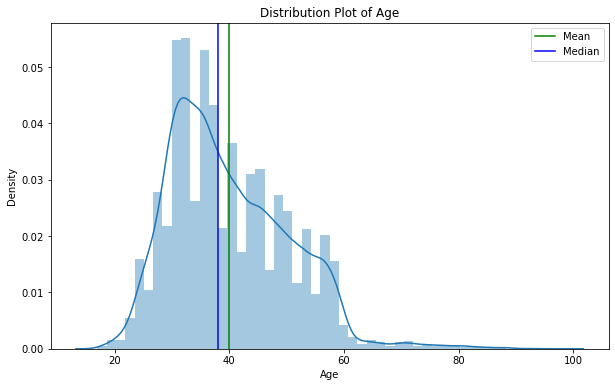

In [25]:
# Check if age is normally distributed

mean=df1['age'].mean()
median=df1['age'].median()
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df1['age'])
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.axvline(mean,color='green',label='Mean') 
plt.axvline(median,color='blue',label='Median')
plt.legend()

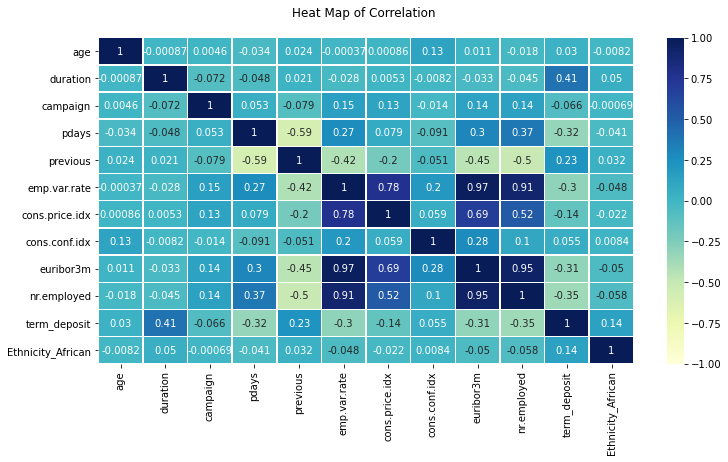

In [26]:
# Pairplot
corr = df1.corr()
#print(corr)
# sns.heatmap(corr, annot = True);
fig, ax = plt.subplots(figsize=(12,6))
plt.title('Heat Map of Correlation \n')
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [27]:
df1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399,-0.008241
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,0.050153
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,-0.000686
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914,-0.040900
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181,0.032229
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334,-0.048399
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211,-0.022121
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878,0.008449
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771,-0.050266
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678,-0.058005


In [28]:
# Look at the skewness of the data

df1.skew()

age                  0.784697
duration             3.263141
campaign             4.762507
pdays               -4.922190
previous             3.832042
emp.var.rate        -0.724096
cons.price.idx      -0.230888
cons.conf.idx        0.303180
euribor3m           -0.709188
nr.employed         -1.044262
term_deposit         2.450330
Ethnicity_African    5.576767
dtype: float64

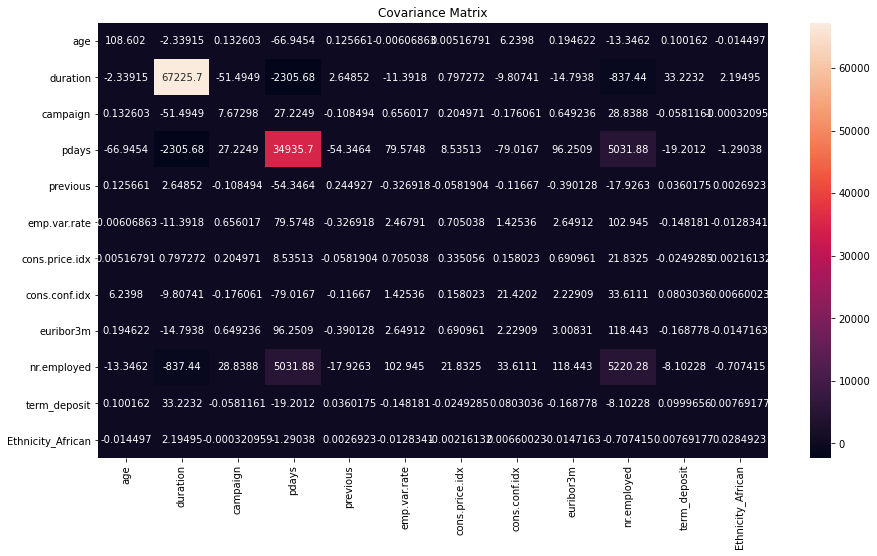

In [30]:
# Covariance Matrix

df2 = pd.DataFrame(df1, columns=df1.columns)
plt.figure(figsize=(15,8))
covMatrix=pd.DataFrame.cov(df1)
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.title('Covariance Matrix')
plt.show()

In [31]:
# Split up the numeric and non-numeric values for later if needed

# select numerical columns
df_numeric = df1.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df1.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values